In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, 'data')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'Billionaires Statistics Dataset.csv'))
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [70]:
df.query("industries == 'Sports' and gender == 'F'")

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
532,523,5100,Sports,Denise York & family,72.0,United States,Youngstown,San Francisco 49ers,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
544,534,5000,Sports,Janice McNair,86.0,United States,Houston,"Energy, sports",Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
580,580,4700,Sports,Gayle Benson,76.0,United States,New Orleans,New Orleans Saints,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
1724,1725,1700,Sports,Amy Adams Strunk,67.0,United States,Nashville,Tennessee Titans,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
2235,2133,1300,Sports,Jessica Steinbrenner,59.0,United States,Tampa,Sports,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
2236,2133,1300,Sports,Jennifer Steinbrenner Swindal,63.0,United States,Tampa,Sports,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


In [4]:
df_bl_per_country_city = df.groupby(['country', 'city']).size()

# Worldmap

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\benne\AppData\Local\Temp\ipykernel_15396\601121909.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [6]:
if isinstance(df_bl_per_country_city, pd.Series):
    df_bl_per_country_city_geo = df_bl_per_country_city.reset_index(name='count')
else:
    df_bl_per_country_city_geo = df_bl_per_country_city

In [7]:
# Merging der Daten
merged = world.merge(df_bl_per_country_city_geo, how='left', left_on='name', right_on='country')

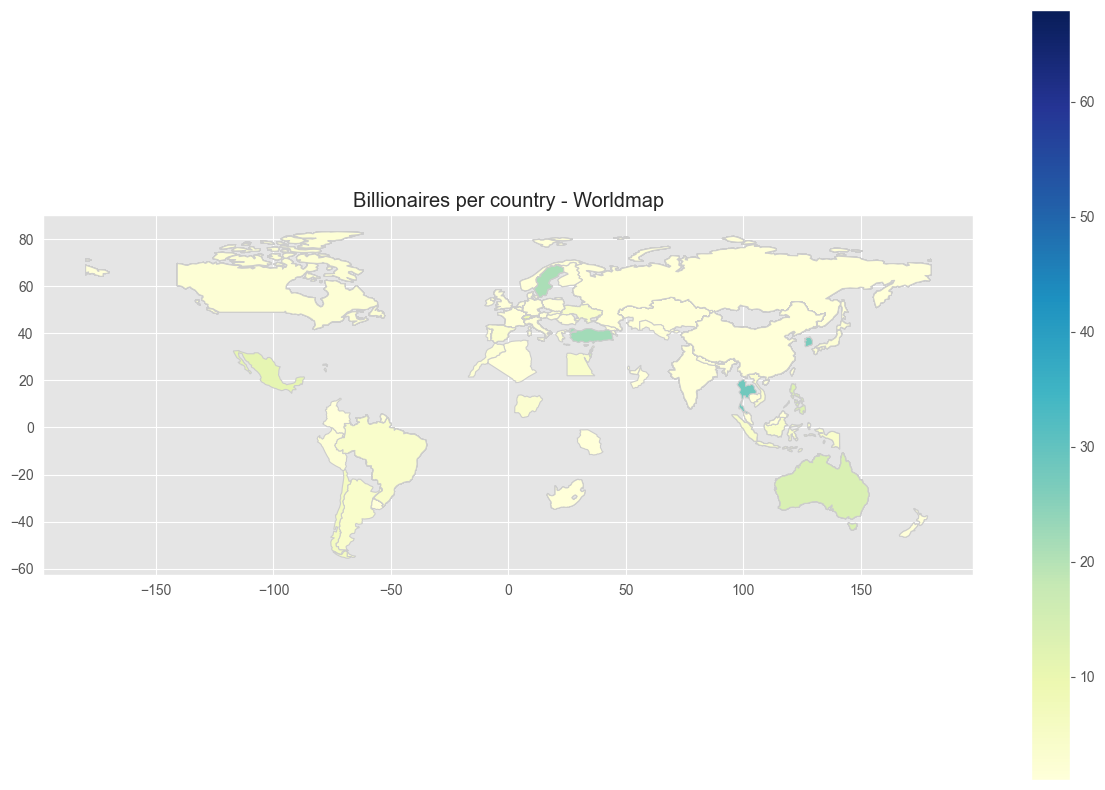

In [8]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='count', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Billionaires per country - Worldmap')
plt.show()

# Billionaires per country

In [216]:
top_countries = df['country'].value_counts().head(20).index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
df_top_countries

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2540,1000,Healthcare,Yi Xianzhong & family,63.0,China,Guangzhou,Pharmaceuticals,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


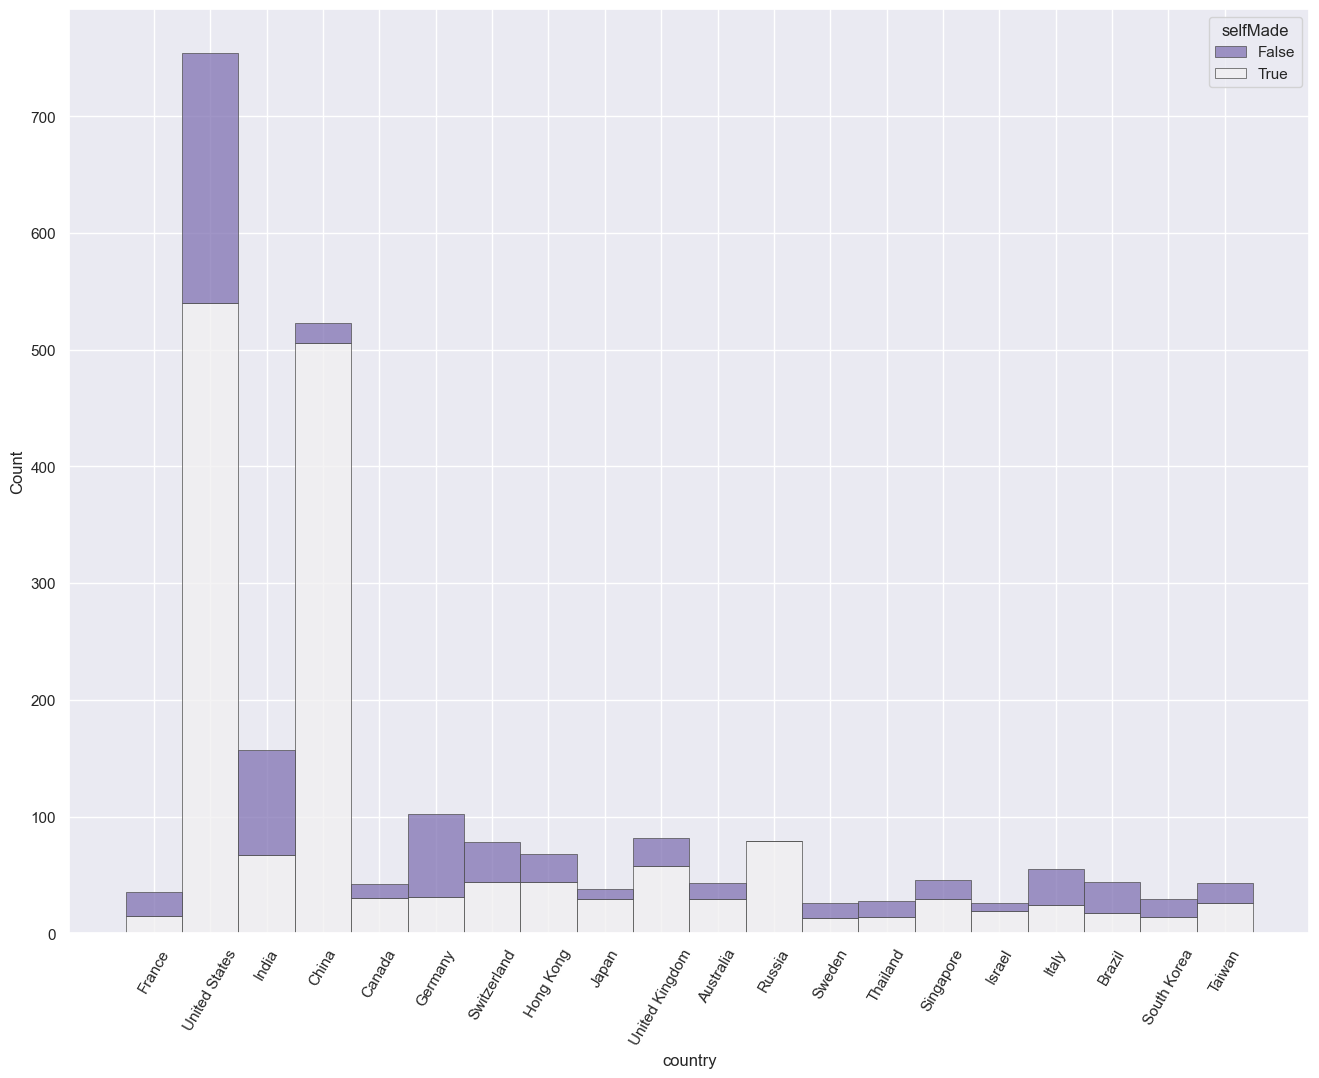

In [232]:
plt.figure(figsize=(16, 12))
sns.histplot(
    df_top_countries,
    x="country", hue="selfMade",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
plt.xticks(rotation=60)
plt.show()

# Billionaires per industry

In [115]:
sns.set_theme(style="darkgrid")

In [156]:
df.query('industries == "Automotive" and gender == "F"')


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
50,51,27400,Automotive,Susanne Klatten,60.0,Germany,Bad Homburg,"BMW, pharmaceuticals",Automotive,Germany,...,1.4,"$3,845,630,030,824",70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
709,699,4000,Automotive,Gail Miller,79.0,United States,Salt Lake City,Car dealerships,Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
994,982,3000,Automotive,Catheline Perier D'Ieteren,78.0,NaN,NaN,"Auto parts, distribution",Automotive,Belgium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,1164,2600,Automotive,Maria-Elisabeth Schaeffler-Thumann,81.0,Germany,Herzogenaurach,Auto parts,Automotive,Germany,...,1.4,"$3,845,630,030,824",70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
1959,1905,1500,Automotive,Lu Zhongfang,80.0,China,Tonghua,Education,Automotive,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2091,2020,1400,Automotive,Qian Jinghong,50.0,China,Wuxi,Electric scooters,Automotive,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2485,2405,1100,Automotive,Renu Munjal,68.0,India,Delhi,Two wheelers,Automotive,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880


In [155]:
df.query('industries == "Automotive" and gender == "F"')['age'].min()
#df[df['industries'] == 'Media & Entertainment']['age'].mean()

50.0

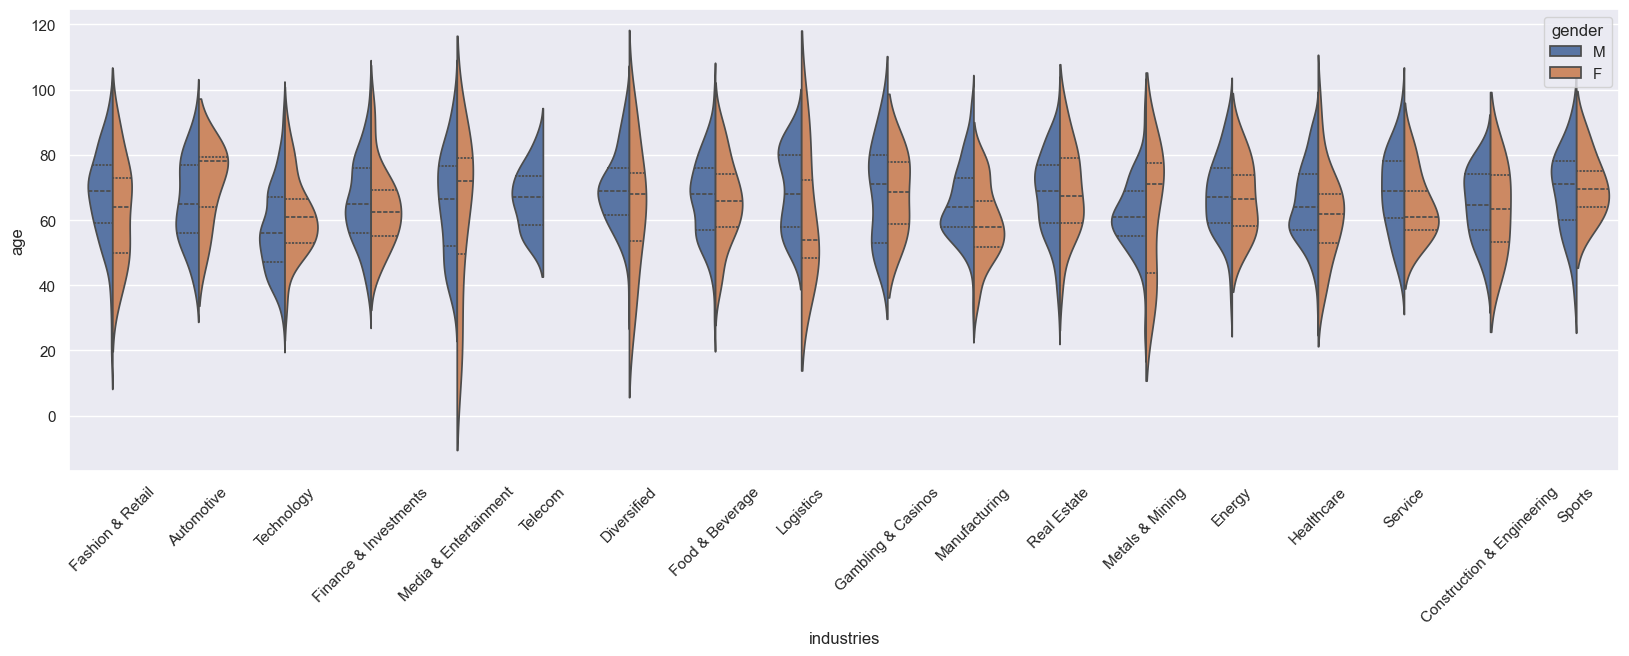

In [256]:
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x="industries", y="age", hue='gender', inner="quart"
               , split=True)
plt.xticks(rotation=45)
plt.show()